# Importing libraries

In [218]:
import numpy as np
import pandas as pd
import kagglehub
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [187]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv")

In [188]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [189]:
# Skimming data and removing any data with too many missing values
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


# Data Visaulization & Cleaning

In [190]:
df_relevant = df.drop(["Date", "Evaporation", "Sunshine"], axis =1)

In [191]:
df_relevant.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [192]:
# listing all comuns name of dataframe
all_columns = df_relevant.columns
all_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

# Determining X and y

In [193]:
# X and y dataset as 2-D arrays
all_columns_1 = all_columns.drop('RainTomorrow')
X = df_relevant.loc[:, all_columns.drop('RainTomorrow')].values
y  = df_relevant.loc[:, 'RainTomorrow'].values

In [194]:
# comverting y into 2-D

y = y.reshape(-1, 1)

# Dealing with invalid  dataset

In [195]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [197]:
# X

# Label Encoding

In [198]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
X[:, 0] = le1.fit_transform(X[:, 0])
le2 = LabelEncoder()
X[:, 4] = le2.fit_transform(X[:, 4])
le3 = LabelEncoder()
X[:, 6] = le3.fit_transform(X[:, 6])
le4 = LabelEncoder()
X[:, 7] = le4.fit_transform(X[:, 7])
le5 = LabelEncoder()
X[:, -1] = le5.fit_transform(X[:, -1])
le6 = LabelEncoder()
y = le6.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature Scaling

In [199]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [200]:
merged = np.concatenate((X, y.reshape(-1, 1)), axis = 1)
df_new = pd.DataFrame(merged, columns = all_columns)
df_new
# all_columns

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.531666,0.191328,-0.041360,-0.203581,1.045228,0.327736,1.328766,1.366458,0.677819,0.623294,0.081409,-1.443652,-1.457215,-1.224564,0.995479,0.607941,-0.014071,0.023104,-0.529795,0.0
1,-1.531666,-0.751052,0.268745,-0.275097,1.258262,0.327736,-0.221338,1.586813,-1.124341,0.394836,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.607941,0.032447,0.387799,-0.529795,0.0
2,-1.531666,0.112796,0.353318,-0.275097,1.471296,0.479465,1.328766,1.586813,0.565184,0.851751,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,-1.454351,0.621667,0.227333,-0.529795,0.0
3,-1.531666,-0.468338,0.677518,-0.275097,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,-1.090136,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.607941,0.171999,0.708731,-0.529795,0.0
4,-1.531666,0.835287,1.283631,-0.155903,1.045228,0.100143,-1.328556,-0.176032,-0.786436,0.166379,0.651924,-0.906314,-0.997221,-1.389630,0.608406,1.020399,0.125481,1.175541,-0.529795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.473544,0.029118,-0.275097,-1.724209,-0.658500,0.442992,-1.498165,-0.110626,-0.861679,-0.955892,-1.345954,1.050495,0.756240,0.608406,0.607941,-1.068465,0.110631,-0.529795,0.0
145456,1.209285,-1.347893,0.296936,-0.275097,-0.446007,-1.341279,0.442992,-1.057454,-0.110626,-1.090136,-0.696567,-1.492501,0.887272,0.576167,0.608406,0.607941,-0.944419,0.416975,-0.529795,0.0
145457,1.209285,-1.065179,0.522466,-0.275097,-1.085108,-0.203314,0.442992,1.366458,-0.561166,-1.090136,-0.852162,-1.345954,0.516309,0.231027,0.608406,0.607941,-0.696326,0.650380,-0.529795,0.0
145458,1.209285,-0.688227,0.536562,-0.275097,0.193094,-0.886093,0.664436,-1.057454,-0.110626,-1.318593,-0.955892,-1.345954,0.278892,0.186009,-0.939884,-1.454351,-0.293175,0.635792,-0.529795,0.0


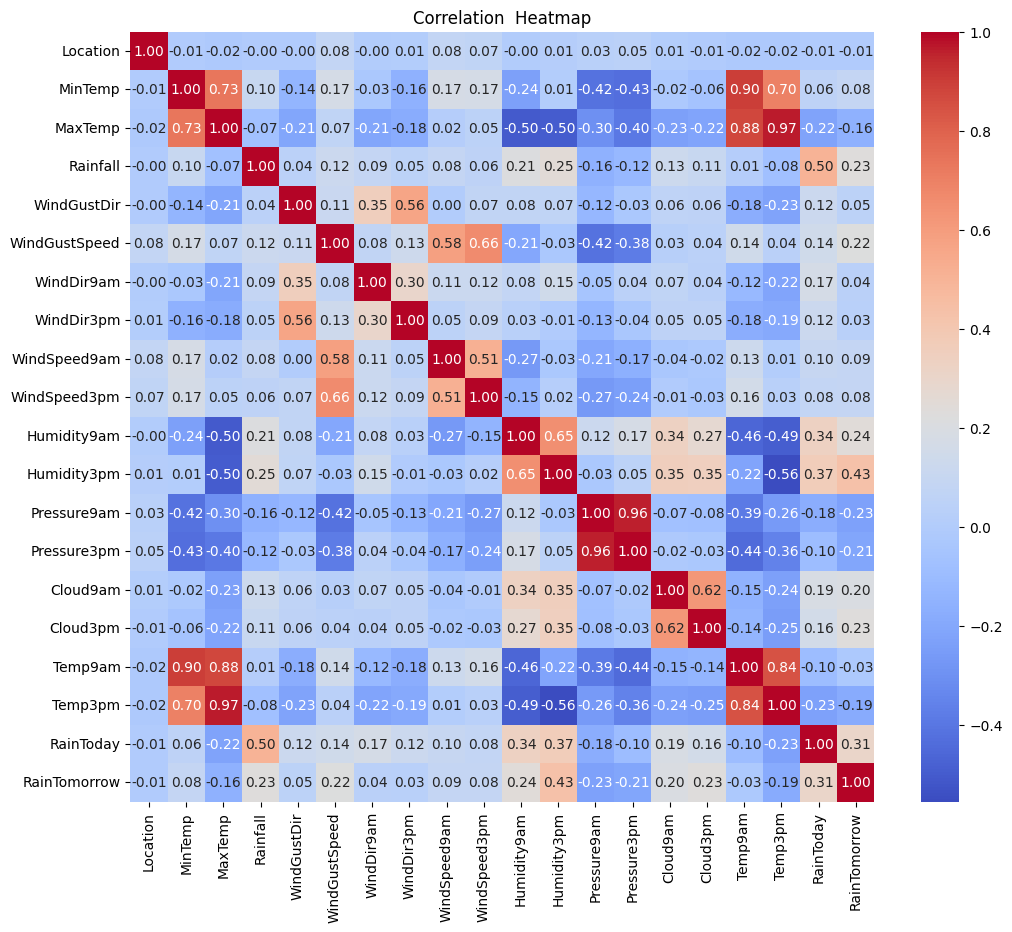

In [201]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation  Heatmap")
plt.show()

# Box Plot

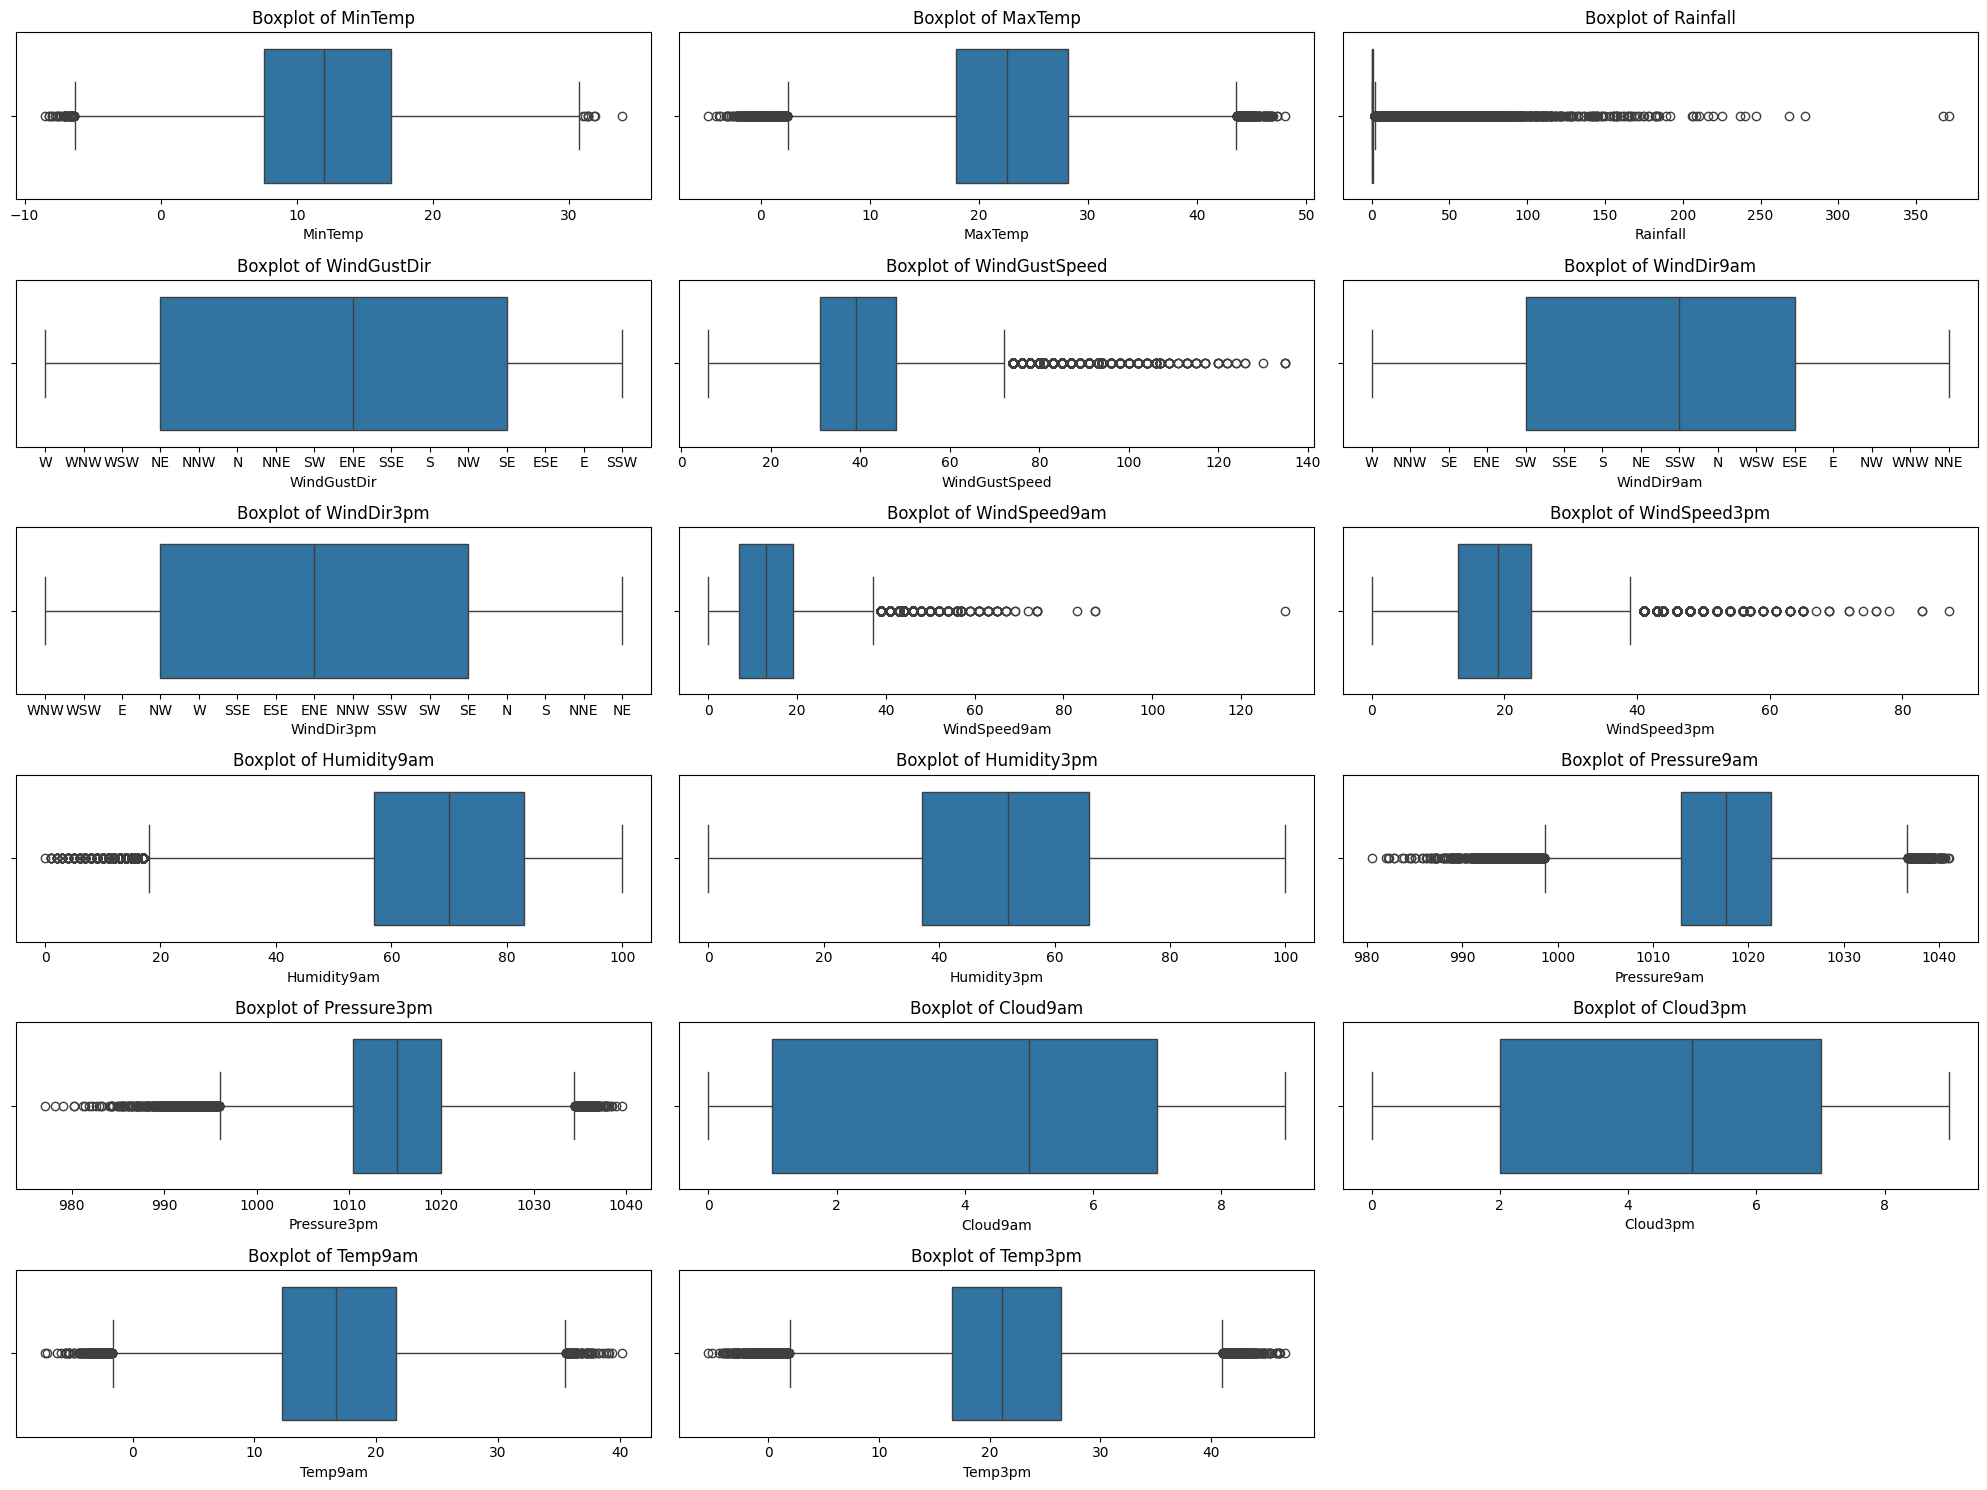

In [203]:
columns = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
    'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Create a 3x6 grid of subplots (adjusting layout for 17 columns)
fig, axes = plt.subplots(6, 3, figsize=(20, 15))  # 6 rows, 3 columns grid

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate over columns and corresponding axes
for i, column in enumerate(columns):
    sns.boxplot(ax=axes[i], data=df_relevant, x=column)  # Pass the `ax` to sns.boxplot
    axes[i].set_title(f"Boxplot of {column}")

# Hide any unused subplots if the number of columns doesn't fill the grid
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing to prevent overlap
plt.tight_layout()
plt.show()

# Split dataset into training and testing

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [205]:
len(X_train), len(X_test)

(116368, 29092)

# Training the model

In [206]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 100, random_state = 0)



## Hyperparameter tuning

In [207]:
# Initilize the ranges of Hyperparameters

param_grid_rf = {
    "n_estimators": [50, 100, 200]
    # "max_features": ["sqrt", "log2"],
    # "max_depth" : [None, 10, 20, 30],
    # "min_samples_split": [2, 5, 10],
    # "min_samples_leaf": [1, 2, 4]
}

In [209]:
# hyperparameter tuning


grid_search_rf = GridSearchCV(estimator = classifier, param_grid = param_grid_rf, cv = 5,
                              n_jobs =-1, verbose = 4)

bestmodelRF = grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [210]:
best_rf_model = grid_search_rf.best_estimator_

print(best_rf_model)
print("best parameters for random forest:", grid_search_rf.best_params_)

RandomForestClassifier(n_estimators=200, random_state=0)
best parameters for random forest: {'n_estimators': 200}


In [211]:
cv_scores  = cross_val_score(best_rf_model, X_train, y_train, cv = 5)
print("Cross Validation scores:", cv_scores)
print("mean")

Cross Validation scores: [0.85305491 0.85322678 0.85644926 0.85167361 0.8541228 ]
mean


In [212]:
y_pred = best_rf_model.predict(X_test)

print("test_accuracy_score:", accuracy_score(y_test, y_pred))
print("test set confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

test_accuracy_score: 0.8538773545992026
test set confusion matrix:
 [[21740   986]
 [ 3265  3101]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.85      0.85      0.84     29092



In [216]:
classifier = RandomForestClassifier(n_estimators= 200, random_state = 0)
classifier.fit(X_train, y_train)

In [220]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv = 5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50), verbose = 1)

In [222]:
train_mean =np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean =np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

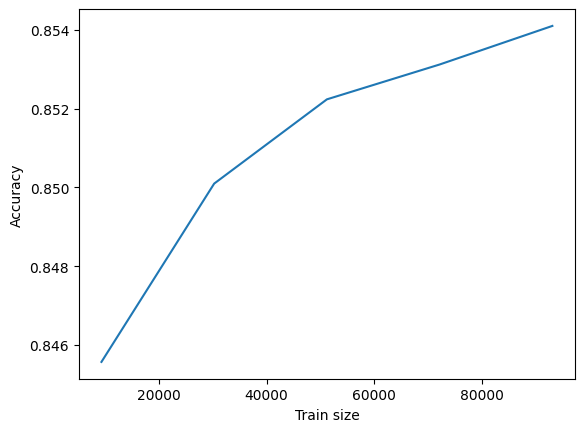

In [261]:
# plt.plot(train_sizes, train_mean, label = "Training Error")
plt.plot(train_sizes, test_mean, label = "Cross-validation Error")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.show()

## Save random forest model in pickle

In [230]:
# save model and feature names to  a pickle file

model_data = {"model": best_rf_model, "feature_names": all_columns.drop('RainTomorrow').tolist()}

with open("rainfall_prediction_RandomForest.pk1", "wb") as file:
  pickle.dump(model_data, file)

### Load the saved random forest model from pickle file and use it for prediction

In [231]:
import pickle
import pandas as pd

In [232]:
with open("rainfall_prediction_RandomForest.pk1", "rb") as file:
  model_data = pickle.load(file)

In [233]:
model = model_data["model"]
feature_names =  model_data["feature_names"]

In [234]:
prediction = best_rf_model.predict(X_test)
print("prediction result:", "Raindall" if prediction[0] == 1 else "no rainfall")
print("test_accuracy_score:", accuracy_score(y_test, prediction))
print("test set confusion matrix:\n", confusion_matrix(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))

prediction result: no rainfall
test_accuracy_score: 0.8538773545992026
test set confusion matrix:
 [[21740   986]
 [ 3265  3101]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.85      0.85      0.84     29092



# Neural Network Model

In [235]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.activations import linear, relu, sigmoid

In [236]:
tf.random.set_seed(1234)  # applied to achieve consistent results

def create_model(optimizer='adam'):
  classifier = Sequential()
  classifier.add(Input(shape=(X_train.shape[1],)))
  classifier.add(Dense(64, activation='relu', name = 'layer1'))
  classifier.add(Dense(32, activation='relu', name = 'layer2'))
  classifier.add(Dense(1, activation='sigmoid', name = 'Outputlayer'))


  classifier.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = optimizer,
    metrics = ['accuracy']
  )

  return classifier

## Fitting the neural network model

In [240]:
# Initilize the ranges of Hyperparameters

param_grid_nn = {
    'optimizer': ['rmsprop', 'adam']
}

In [241]:
# !pip install scikeras
from scikeras.wrappers import KerasClassifier

classifier = KerasClassifier(model = create_model, epochs=10, verbose=1)

In [242]:
grid = GridSearchCV(estimator = classifier, param_grid = param_grid_nn, n_jobs = 1, cv=3)

In [243]:
try:
    grid_result = grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error: {e}")

Epoch 1/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8353 - loss: 0.3857
Epoch 2/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8484 - loss: 0.3550
Epoch 3/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8505 - loss: 0.3500
Epoch 4/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8518 - loss: 0.3469
Epoch 5/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8535 - loss: 0.3444
Epoch 6/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8538 - loss: 0.3424
Epoch 7/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8544 - loss: 0.3407
Epoch 8/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8549 - loss: 0.3393
Epoch 9/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8559 - loss: 0.3379
Epoch 10/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8562 - loss: 0.3368
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10
2425/2425 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8331 - l

In [244]:
best_rf_model_nn = grid.best_estimator_

print(best_rf_model_nn)
print("best parameters for random forest:", grid.best_params_)

KerasClassifier(
	model=<function create_model at 0x7dfcd4a3b880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)
best parameters for random forest: {'optimizer': 'adam'}


In [245]:
bestClassifier = create_model('adam')
HistoryBest = bestClassifier.fit(x = X_train, y = y_train, batch_size = 16, epochs =10 , verbose = 0)

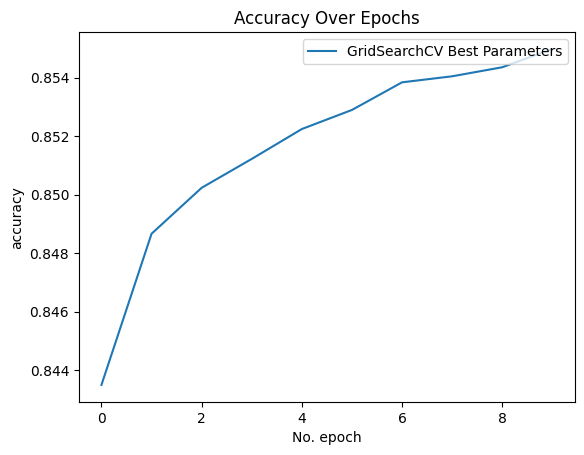

In [246]:
plt.plot(HistoryBest.history['accuracy'], label='GridSearchCV Best Parameters')
plt.title('Accuracy Over Epochs')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [247]:
cv_scores_nn  = cross_val_score(best_rf_model_nn, X_train, y_train, cv = 5)
print("Cross Validation scores:", cv_scores_nn)
print("mean:", np.mean(cv_scores_nn))

Epoch 1/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8303 - loss: 0.3845
Epoch 2/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8474 - loss: 0.3525
Epoch 3/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8482 - loss: 0.3480
Epoch 4/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8499 - loss: 0.3447
Epoch 5/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8509 - loss: 0.3425
Epoch 6/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8527 - loss: 0.3403
Epoch 7/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8534 - loss: 0.3385
Epoch 8/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8543 - loss: 0.3370
Epoch 9/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8546 - loss: 0.3357
Epoch 10/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8558 - loss: 0.3344
728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8337 - los

In [249]:
y_pred_nn = best_rf_model_nn.predict(X_test)

print("test_accuracy_score:", accuracy_score(y_test, y_pred_nn))
print("test set confusion matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification Report: \n", classification_report(y_test, y_pred_nn))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
test_accuracy_score: 0.8515743159631514
test set confusion matrix:
 [[21660  1066]
 [ 3252  3114]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.74      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



## Save neural network model in pickle file

In [250]:
# save model and feature names to  a pickle file

model_data_nn = {"model": best_rf_model_nn, "feature_names": all_columns.drop('RainTomorrow').tolist()}

with open("rainfall_prediction_neural_network.pk1", "wb") as file:
  pickle.dump(model_data_nn, file)

### Load the saved neural network model from file and use it for prediction

In [251]:
import pickle
import pandas as pd

In [252]:
with open("rainfall_prediction_neural_network.pk1", "rb") as file:
  model_data_nn = pickle.load(file)

In [253]:
model_nn = model_data_nn["model"]
feature_names_nn =  model_data_nn["feature_names"]

In [254]:
prediction_nn = best_rf_model_nn.predict(X_test)
print("prediction result:", "Raindall" if prediction[0] == 1 else "no rainfall")
print("test_accuracy_score:", accuracy_score(y_test, prediction_nn))
print("test set confusion matrix:\n", confusion_matrix(y_test, prediction_nn))
print("Classification Report: \n", classification_report(y_test, prediction_nn))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
prediction result: no rainfall
test_accuracy_score: 0.8515743159631514
test set confusion matrix:
 [[21660  1066]
 [ 3252  3114]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.74      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092

